In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Andy' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
import numpy as np
import datetime
import time
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pydotplus
from IPython.display import Image
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
ticker = "SPG"
start_date = "2011-05-01"
end_date = "2021-05-31"

stock_df = yf.download(ticker, start=start_date, end=end_date)
stock_df["pct_change"] = stock_df['Close'].pct_change().dropna()
stock_df['decision'] = np.where(stock_df['pct_change'] > 0, 'Buy' , 'Sell')
stock_df.dropna(inplace=True)
stock_df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change,decision
Date,,,,,,,,
2011-05-03,109.125114,110.263405,107.638756,109.190971,73.433495,2362518,0.003545,Buy
2011-05-04,108.965195,109.501411,108.297272,108.739418,73.129829,1906384,-0.004135,Sell
2011-05-05,108.156158,109.219193,107.714020,108.410156,72.908379,1391999,-0.003028,Sell
2011-05-06,109.557854,109.557854,107.572906,108.099716,72.699623,1680178,-0.002864,Sell
2011-05-09,108.222015,109.322670,107.798683,108.889931,73.231033,949472,0.007310,Buy
2011-05-10,109.247414,110.498589,109.002823,110.442146,74.274925,1426759,0.014255,Buy
2011-05-11,110.094070,110.507996,109.680153,109.783630,73.832069,1884593,-0.005963,Sell
2011-05-12,109.238007,110.075256,108.570084,110.018814,73.990242,1594500,0.002142,Buy
2011-05-13,109.755409,109.774223,108.400749,108.438385,73.429657,1638933,-0.014365,Sell


In [18]:
X = stock_df.copy()
X.drop(['decision', 'pct_change'], axis=1, inplace=True)
X.dropna(inplace=True)
X.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-03,109.125114,110.263405,107.638756,109.190971,73.433495,2362518
2011-05-04,108.965195,109.501411,108.297272,108.739418,73.129829,1906384
2011-05-05,108.156158,109.219193,107.714020,108.410156,72.908379,1391999
2011-05-06,109.557854,109.557854,107.572906,108.099716,72.699623,1680178
2011-05-09,108.222015,109.322670,107.798683,108.889931,73.231033,949472


In [19]:
y = stock_df['decision'].values.reshape(-1,1)
y[:5]

array([['Buy'],
       ['Sell'],
       ['Sell'],
       ['Sell'],
       ['Buy']], dtype=object)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [23]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=1000,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.978
Accuracy score (validation): 0.757

Learning rate:  0.1
Accuracy score (training): 0.998
Accuracy score (validation): 0.757

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.760

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.756

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.749

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.756



In [24]:
predictions_df = pd.DataFrame({"Actual": y_test.ravel(),"Prediction": predictions})
predictions_df.head()

,Actual,Prediction
0,Buy,Sell
1,Buy,Buy
2,Sell,Sell
3,Sell,Buy
4,Buy,Sell


In [25]:
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=1,
    max_features=5,
    max_depth=3,
    random_state=0)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.760


In [26]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Buy", "Actual Sell"], columns=["Predicted Buy", "Predicted Sell"]
)

acc_score = accuracy_score(y_test, predictions)

In [27]:
print('Confusion Matrix')
display(cm_df)
print()
print(f'Accuracy Score: {acc_score:.3f}')
print()
print('Classification Report')
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Buy,Predicted Sell
Actual Buy,270,75
Actual Sell,76,213



Accuracy Score: 0.762

Classification Report
              precision    recall  f1-score   support

         Buy       0.78      0.78      0.78       345
        Sell       0.74      0.74      0.74       289

    accuracy                           0.76       634
   macro avg       0.76      0.76      0.76       634
weighted avg       0.76      0.76      0.76       634



In [28]:
dot_data = tree.export_graphviz(
    model.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)



In [29]:
graph = pydotplus.graph_from_dot_data(dot_data)

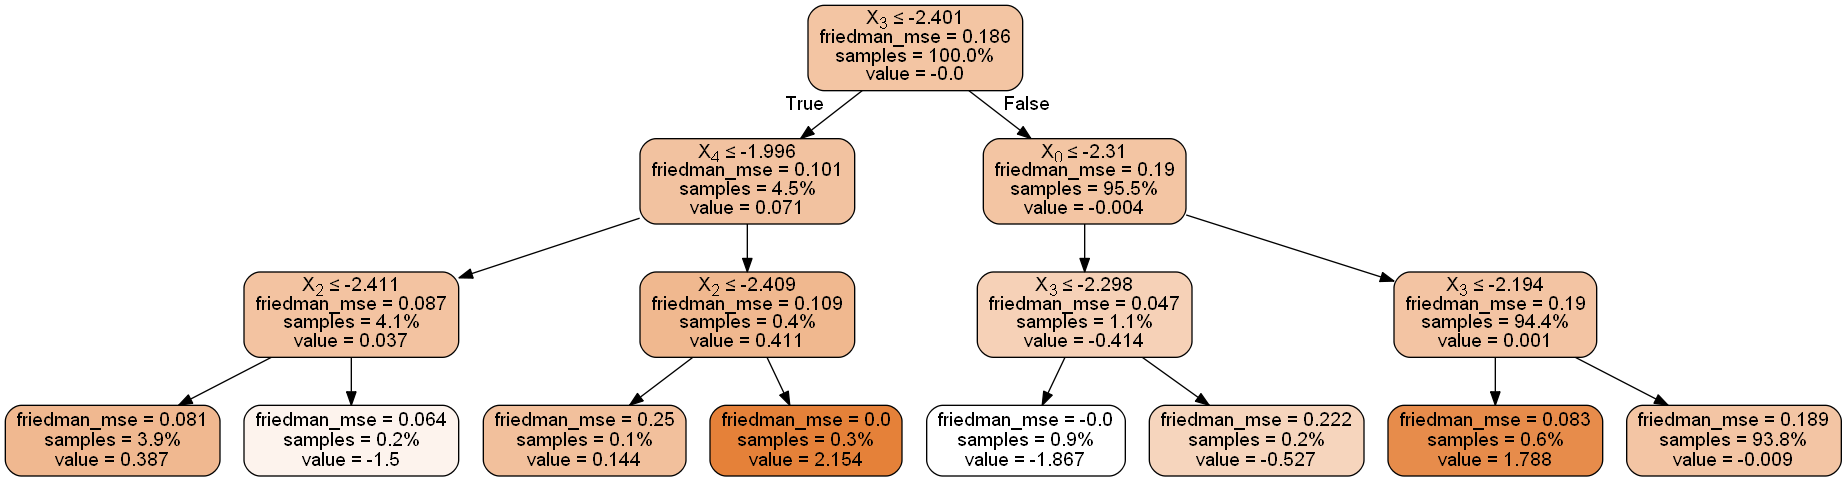

In [30]:
Image(graph.create_png())